In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as t_t_s
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [118]:
#reading the file
df=pd.read_csv('Life Expectancy Data.csv')
df=round(df)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.0,71.0,65.0,1154,...,6.0,8.0,65.0,0.0,584.0,33736494.0,17.0,17.0,0.0,10.0
1,Afghanistan,2014,Developing,60.0,271.0,64,0.0,74.0,62.0,492,...,58.0,8.0,62.0,0.0,613.0,327582.0,18.0,18.0,0.0,10.0
2,Afghanistan,2013,Developing,60.0,268.0,66,0.0,73.0,64.0,430,...,62.0,8.0,64.0,0.0,632.0,31731688.0,18.0,18.0,0.0,10.0
3,Afghanistan,2012,Developing,60.0,272.0,69,0.0,78.0,67.0,2787,...,67.0,9.0,67.0,0.0,670.0,3696958.0,18.0,18.0,0.0,10.0
4,Afghanistan,2011,Developing,59.0,275.0,71,0.0,7.0,68.0,3013,...,68.0,8.0,68.0,0.0,64.0,2978599.0,18.0,18.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.0,723.0,27,4.0,0.0,68.0,31,...,67.0,7.0,65.0,34.0,454.0,12777511.0,9.0,9.0,0.0,9.0
2934,Zimbabwe,2003,Developing,44.0,715.0,26,4.0,0.0,7.0,998,...,7.0,7.0,68.0,37.0,453.0,12633897.0,10.0,10.0,0.0,10.0
2935,Zimbabwe,2002,Developing,45.0,73.0,25,4.0,0.0,73.0,304,...,73.0,7.0,71.0,40.0,57.0,125525.0,1.0,1.0,0.0,10.0
2936,Zimbabwe,2001,Developing,45.0,686.0,25,2.0,0.0,76.0,529,...,76.0,6.0,75.0,42.0,549.0,12366165.0,2.0,2.0,0.0,10.0


In [119]:
#chanding word to number
temp=[]
for i in df.Status:
    if i=="Developing":
        temp.append(0)
    elif i=="Developed":
        temp.append(1)
df.Status=temp
le = preprocessing.LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,0,65.0,263.0,62,0.0,71.0,65.0,1154,...,6.0,8.0,65.0,0.0,584.0,33736494.0,17.0,17.0,0.0,10.0
1,0,2014,0,60.0,271.0,64,0.0,74.0,62.0,492,...,58.0,8.0,62.0,0.0,613.0,327582.0,18.0,18.0,0.0,10.0
2,0,2013,0,60.0,268.0,66,0.0,73.0,64.0,430,...,62.0,8.0,64.0,0.0,632.0,31731688.0,18.0,18.0,0.0,10.0
3,0,2012,0,60.0,272.0,69,0.0,78.0,67.0,2787,...,67.0,9.0,67.0,0.0,670.0,3696958.0,18.0,18.0,0.0,10.0
4,0,2011,0,59.0,275.0,71,0.0,7.0,68.0,3013,...,68.0,8.0,68.0,0.0,64.0,2978599.0,18.0,18.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,0,44.0,723.0,27,4.0,0.0,68.0,31,...,67.0,7.0,65.0,34.0,454.0,12777511.0,9.0,9.0,0.0,9.0
2934,192,2003,0,44.0,715.0,26,4.0,0.0,7.0,998,...,7.0,7.0,68.0,37.0,453.0,12633897.0,10.0,10.0,0.0,10.0
2935,192,2002,0,45.0,73.0,25,4.0,0.0,73.0,304,...,73.0,7.0,71.0,40.0,57.0,125525.0,1.0,1.0,0.0,10.0
2936,192,2001,0,45.0,686.0,25,2.0,0.0,76.0,529,...,76.0,6.0,75.0,42.0,549.0,12366165.0,2.0,2.0,0.0,10.0


In [120]:
#normalization of data
sum=df.sum()
max=df.max()
min=df.min()
# print(sum)
row, col=df.shape
for i in range(col):
    temp=[]
    for j in range(row):
        x=df.iloc[j,i]
        mean=(x-(sum[i]/row))/(max[i]-min[i])
        temp.append(mean)
# print(df.iloc[1,0])
    df.iloc[:,i]=temp
# print(df.iloc[:,0])
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-0.495293,0.498752,-0.174268,-0.075395,0.136793,0.017609,-0.238390,-0.034253,-0.007200,-0.005965,...,-0.791837,0.140345,-0.173110,-0.032442,-0.048318,0.018405,0.435987,0.420436,-0.697754,-0.063017
1,-0.495293,0.432085,-0.174268,-0.169734,0.147873,0.018720,-0.238390,-0.034099,-0.037812,-0.009085,...,-0.250170,0.140345,-0.204038,-0.032442,-0.048075,-0.007416,0.471701,0.454919,-0.697754,-0.063017
2,-0.495293,0.365419,-0.174268,-0.169734,0.143718,0.019831,-0.238390,-0.034151,-0.017404,-0.009377,...,-0.208504,0.140345,-0.183420,-0.032442,-0.047915,0.016855,0.471701,0.454919,-0.697754,-0.063017
3,-0.495293,0.298752,-0.174268,-0.169734,0.149258,0.021498,-0.238390,-0.033894,0.013208,0.001732,...,-0.156420,0.195900,-0.152492,-0.032442,-0.047596,-0.004812,0.471701,0.454919,-0.697754,-0.063017
4,-0.495293,0.232085,-0.174268,-0.188602,0.153413,0.022609,-0.238390,-0.037539,0.023412,0.002797,...,-0.146004,0.140345,-0.142182,-0.032442,-0.052681,-0.005367,0.471701,0.454919,-0.697754,-0.063017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0.504707,-0.234581,-0.174268,-0.471621,0.773912,-0.001836,-0.016167,-0.037898,0.023412,-0.011257,...,-0.156420,0.084789,-0.173110,0.634225,-0.049409,0.002206,0.150272,0.144574,-0.697754,-0.110636
2934,0.504707,-0.301248,-0.174268,-0.471621,0.762832,-0.002391,-0.016167,-0.037898,-0.599037,-0.006700,...,-0.781420,0.084789,-0.142182,0.693048,-0.049417,0.002095,0.185987,0.179057,-0.697754,-0.063017
2935,0.504707,-0.367915,-0.174268,-0.452753,-0.126365,-0.002947,-0.016167,-0.037898,0.074433,-0.009971,...,-0.093920,0.084789,-0.111255,0.751872,-0.052740,-0.007572,-0.135442,-0.131288,-0.697754,-0.063017
2936,0.504707,-0.434581,-0.174268,-0.452753,0.722665,-0.002947,-0.127279,-0.037898,0.105045,-0.008910,...,-0.062670,0.029234,-0.070017,0.791088,-0.048612,0.001888,-0.099728,-0.096805,-0.697754,-0.063017


In [121]:
#replace null value with avg value 
for i in df:
    df[i]=df[i].fillna(sum[i]/row)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-0.495293,0.498752,-0.174268,-0.075395,0.136793,0.017609,-0.238390,-0.034253,-0.007200,-0.005965,...,-0.791837,0.140345,-0.173110,-0.032442,-0.048318,0.018405,0.435987,0.420436,-0.697754,-0.063017
1,-0.495293,0.432085,-0.174268,-0.169734,0.147873,0.018720,-0.238390,-0.034099,-0.037812,-0.009085,...,-0.250170,0.140345,-0.204038,-0.032442,-0.048075,-0.007416,0.471701,0.454919,-0.697754,-0.063017
2,-0.495293,0.365419,-0.174268,-0.169734,0.143718,0.019831,-0.238390,-0.034151,-0.017404,-0.009377,...,-0.208504,0.140345,-0.183420,-0.032442,-0.047915,0.016855,0.471701,0.454919,-0.697754,-0.063017
3,-0.495293,0.298752,-0.174268,-0.169734,0.149258,0.021498,-0.238390,-0.033894,0.013208,0.001732,...,-0.156420,0.195900,-0.152492,-0.032442,-0.047596,-0.004812,0.471701,0.454919,-0.697754,-0.063017
4,-0.495293,0.232085,-0.174268,-0.188602,0.153413,0.022609,-0.238390,-0.037539,0.023412,0.002797,...,-0.146004,0.140345,-0.142182,-0.032442,-0.052681,-0.005367,0.471701,0.454919,-0.697754,-0.063017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0.504707,-0.234581,-0.174268,-0.471621,0.773912,-0.001836,-0.016167,-0.037898,0.023412,-0.011257,...,-0.156420,0.084789,-0.173110,0.634225,-0.049409,0.002206,0.150272,0.144574,-0.697754,-0.110636
2934,0.504707,-0.301248,-0.174268,-0.471621,0.762832,-0.002391,-0.016167,-0.037898,-0.599037,-0.006700,...,-0.781420,0.084789,-0.142182,0.693048,-0.049417,0.002095,0.185987,0.179057,-0.697754,-0.063017
2935,0.504707,-0.367915,-0.174268,-0.452753,-0.126365,-0.002947,-0.016167,-0.037898,0.074433,-0.009971,...,-0.093920,0.084789,-0.111255,0.751872,-0.052740,-0.007572,-0.135442,-0.131288,-0.697754,-0.063017
2936,0.504707,-0.434581,-0.174268,-0.452753,0.722665,-0.002947,-0.127279,-0.037898,0.105045,-0.008910,...,-0.062670,0.029234,-0.070017,0.791088,-0.048612,0.001888,-0.099728,-0.096805,-0.697754,-0.063017


In [122]:
#selecting correlated columns
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

<AxesSubplot:>

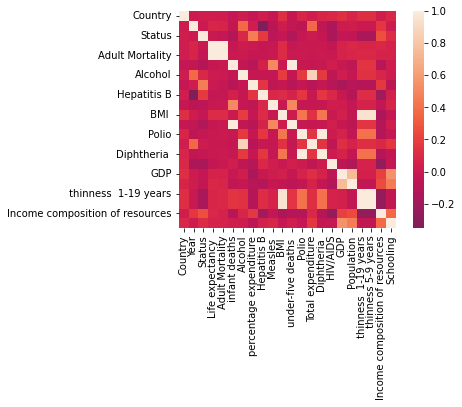

In [123]:
sns.heatmap(df.corr(),cmap='rocket',center=0,annot=False,square=True)

In [124]:
#dividing and dropping data 
target=df['Life expectancy ']
df=df.drop(['Life expectancy '],axis=1)
corr_col=correlation(df,0.8)
#df=df.drop(['Life expectancy '],axis=1)
features=df.drop(corr_col,axis=1)
X_train,X_test,Y_train,Y_test=t_t_s(pd.get_dummies(features),target,test_size=0.3)
corr_col

{' thinness  1-19 years',
 ' thinness 5-9 years',
 'Diphtheria ',
 'Total expenditure',
 'under-five deaths '}

In [125]:
#predicting
lr=LinearRegression()
lr.fit(X_train,Y_train)
print(lr.score(X_test,Y_test))

0.9989705648741483


In [126]:
#result
y_pred = lr.predict(X_test)
r2_score(y_pred, Y_test)

0.9989670597921212